<h1></h1>

<center>
    <h1>
        <b>Comparación entre Power BI y Tableau: </b>
    </h1>
</center>
<center>
    <h2>
        Un enfoque en la integración de la IA en dos plataformas lideres 
del Bussiness Intelligence
    </h2>
</center>
<center>
    <h3>
        <div class="alert alert-block alert-warning">
            Evaluación resultados Key Influencers     
        </div>
    </h3>
</center>

Yuli Natalia Suárez Rodriguez  <br>
<b> Julio - 2024</b>

## Importar librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm

## Cargar el conjunto de datos
Para la validación de los resultados obtenidos en el grafico Key Influencers, se extraen las columnas usadas en el gráfico de Key Influencers directamente de los datos transformados en Power BI.
Los datos son guardador en el repositorio de GitHub: https://github.com/YNSuarez/ComparacionPowerBIyTableau


In [31]:
#Cargue del conjunto de datos
ruta = "https://raw.githubusercontent.com/YNSuarez/ComparacionPowerBIyTableau/main/KeyInfluencerData.csv"
data = pd.read_csv(ruta)

## Inspeccionar el conjunto de datos
Se proporciona una visión completa de las dimensiones del dataset, confirmando que los datos coincidan con los de PowerBi

### Dimensionamiento del dataset

In [32]:
# Tamaño del dataset
print("Cantidad de filas y columnas del conjunto de datos:", data.shape)

# Obtener las primeras y últimas filas
first = data.head(3)
last = data.tail(3)

result = pd.concat([first, last])
result

Cantidad de filas y columnas del conjunto de datos: (51290, 12)


,Ship Mode,Segment,Market,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Country
0,Standard Class,Consumer,EU,Office Supplies,Appliances,1135.80,2.0,0.00,90.84,93.100,Medium,United States
1,Standard Class,Consumer,US,Office Supplies,Binders,735.98,2.0,0.00,331.19,52.130,Medium,United States
2,Standard Class,Consumer,LATAM,Office Supplies,Appliances,722.36,2.0,0.00,50.56,44.076,Medium,United States
51287,Standard Class,Consumer,APAC,Office Supplies,Envelopes,21.76,1.0,0.45,-13.07,0.300,High,United States
51288,Standard Class,Corporate,APAC,Office Supplies,Paper,14.78,2.0,0.45,-2.20,0.250,Medium,United States
51289,Standard Class,Corporate,APAC,Office Supplies,Fasteners,4.57,1.0,0.45,-3.17,0.200,Medium,United States


### Información básica del dataset

In [33]:
# Mostrar información sobre las columnas, tipos de datos y valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       51290 non-null  object 
 1   Segment         51290 non-null  object 
 2   Market          51290 non-null  object 
 3   Category        51290 non-null  object 
 4   Sub-Category    51290 non-null  object 
 5   Sales           51290 non-null  float64
 6   Quantity        51290 non-null  float64
 7   Discount        51290 non-null  float64
 8   Profit          51290 non-null  float64
 9   Shipping Cost   51290 non-null  float64
 10  Order Priority  51290 non-null  object 
 11  Country         51280 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.7+ MB


In [6]:
#Mostrar conteo de valores unicos por columna
data.nunique()

Ship Mode             4
Segment               3
Market                7
Category              3
Sub-Category         17
Sales             20049
Quantity             14
Discount             23
Profit            16578
Shipping Cost     16877
Order Priority        4
Country             147
dtype: int64

### Preparación de datos
Se convierten las variables categóricas en variables dummy para que puedan ser utilizadas en el modelo de regresión.

In [34]:
# Codificación de variables categóricas
datos_codificados = pd.get_dummies(data, columns=['Ship Mode','Segment','Market','Category','Sub-Category','Order Priority','Country'])


### Análisis de regresión
Se define las variables independientes "x" y las variable dependiente "y" = Ganancias ("Profit"). Y se aplica la biblioteca de 'statsmodels' teniendo en cuenta su capacidad para el análisis estadístico detallado, útil para la validación del presente estudio.

In [14]:
# Definir las variables dependientes e independientes
X = datos_codificados.drop('Profit', axis=1)
y = datos_codificados['Profit']

In [9]:
# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión
modelo_regresion = sm.OLS(y, X).fit()

# Mostrar el resumen del análisis de regresión
print(modelo_regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     146.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:55:30   Log-Likelihood:            -3.2675e+05
No. Observations:               51290   AIC:                         6.539e+05
Df Residuals:                   51108   BIC:                         6.555e+05
Df Model:                         181                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Análisis de correlación
Se calcula un matriz de correlación para evaluar la fuerza y dirección de las relaciones entre Profit y otras variables.

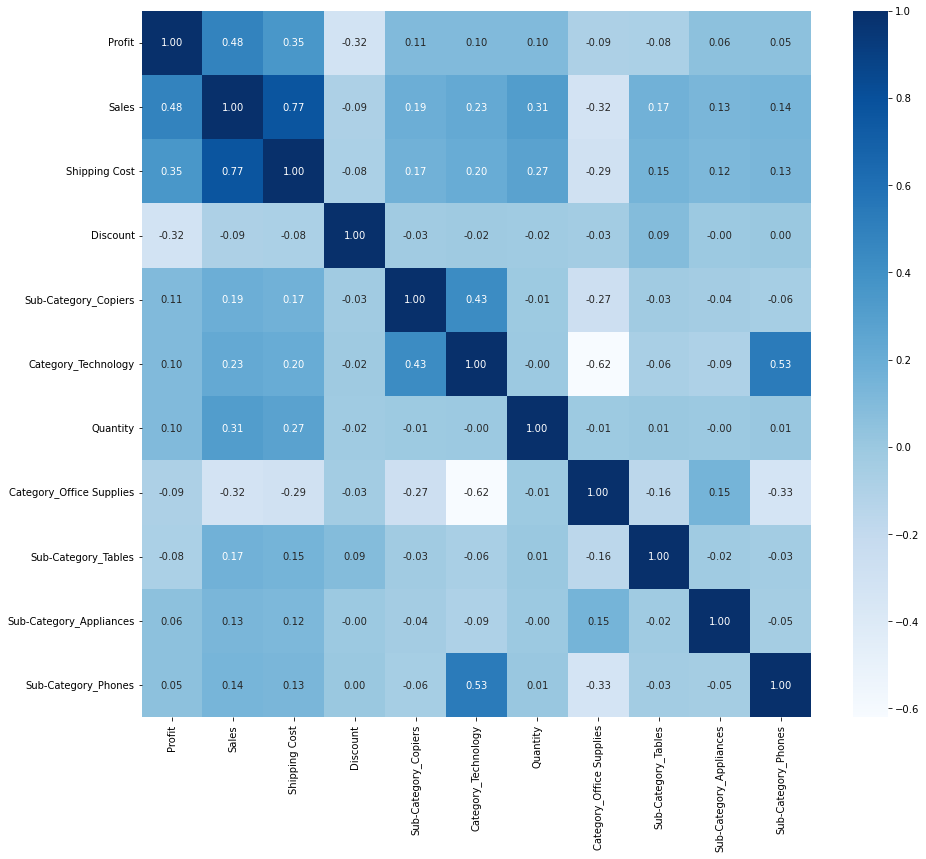

In [38]:
# Matriz de correlación para las variables seleccionadas
matriz_correlacion = datos_codificados.corr()

# Seleccionar las 10 variables con las correlaciones más significativas con Profit
correlaciones_profit = matriz_correlacion['Profit'].abs().sort_values(ascending=False).head(11).index
matriz_correlacion_significativa = matriz_correlacion.loc[correlaciones_profit, correlaciones_profit]

# Crear un mapa de calor para las variables seleccionadas
plt.figure(figsize=(15, 13))
sns.heatmap(matriz_correlacion_significativa, 
            annot=True,  
            cmap='Blues',
            fmt='.2f')
#plt.title("Matriz de Correlación para las Variables Más Significativas")
plt.show()

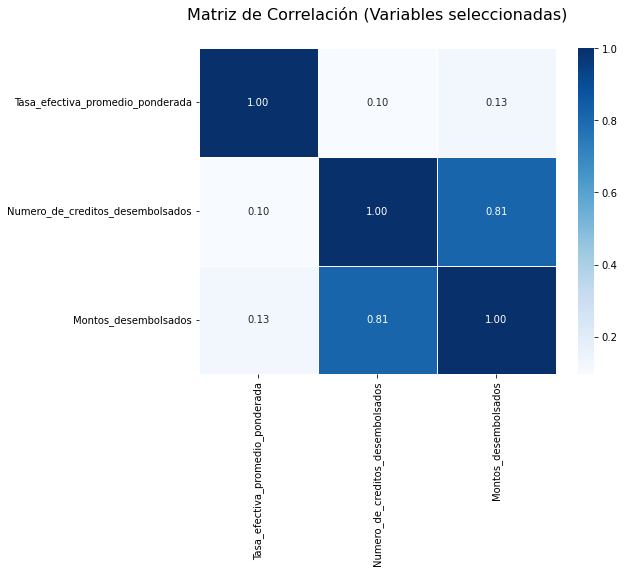

In [ ]:
# Extraer las variables a analizar
df_selected = df_cleaned[['Tasa_efectiva_promedio_ponderada', 'Numero_de_creditos_desembolsados','Montos_desembolsados']]

# Matriz de correlación para las variables seleccionadas
correlation_matrix_selected = df_selected.corr()

# Crear un mapa de calor para las variables seleccionadas
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected,
            annot=True,
            cmap='Blues',
            fmt='.2f',
            linewidths=0.5)
plt.title('Matriz de Correlación (Variables seleccionadas)', size=16, y=1.07)
plt.show()

### Análisis de regresión lineal

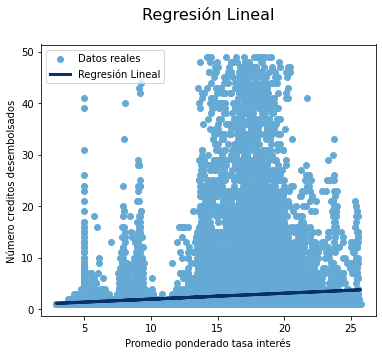

Métricas de evaluación:
Error absoluto medio: 2.3085299120629172
Error cuadrático medio: 24.763947369257696
Raíz cuadrada del error cuadrático medio: 4.976338751457511
Coeficiente de determinación (R^2): 0.009161993114045752


In [13]:
# Definición de variables
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[[variable_x]]
y = df_cleaned[variable_y]

# Modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo con las variables
modelo_regresion.fit(X, y)

# Determinar la predicción
predicciones = modelo_regresion.predict(X)

# Graficar los resultados
plt.figure(figsize=(6, 5))
plt.scatter(X.values, y.values, c='#65AAD4', label='Datos reales')
plt.plot(X.values, predicciones, color='#08306B', linewidth=3, label='Regresión Lineal')
plt.title('Regresión Lineal', size=16, y=1.07)
plt.xlabel("Promedio ponderado tasa interés")
plt.ylabel("Número creditos desembolsados")
plt.legend()
plt.show()

# Imprimir las métricas de evaluación del modelo
print('Métricas de evaluación:')
print('Error absoluto medio:', metrics.mean_absolute_error(y, predicciones))
print('Error cuadrático medio:', metrics.mean_squared_error(y, predicciones))
print('Raíz cuadrada del error cuadrático medio:', metrics.mean_squared_error(y, predicciones, squared=False))
print('Coeficiente de determinación (R^2):', metrics.r2_score(y, predicciones))

### Análisis de regresión no lineal (cuadrática)

Coeficientes (a, b, c): [ 0.00725361 -0.07654365  1.89117003]


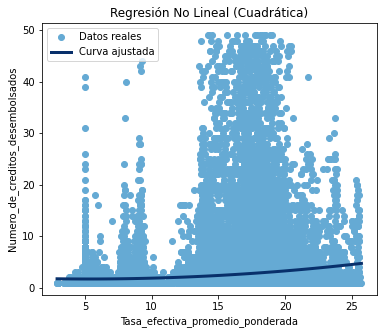

Error Absoluto Medio: 2.300334021283088
Error Cuadrático Medio: 24.738576005824754
Raíz del Error Cuadrático Medio: 4.973788898397755
R-cuadrado: 0.010177134634136498


In [17]:
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[variable_x]
y = df_cleaned[variable_y]

# Definir la función cuadrática
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# Ajustar la curva a los datos de entrenamiento
popt1, pcov1 = curve_fit(quadratic_function, X, y)

print(f'Coeficientes (a, b, c): {popt1}')

# Realizar predicciones en el conjunto de prueba
predicciones = quadratic_function(X, *popt1)

# Crear una gráfica de dispersión con la curva ajustada
plt.figure(figsize=(6, 5))
plt.scatter(X, y, c='#65AAD4', label='Datos reales')
x_range = np.linspace(X.min(), X.max(), 100)
plt.plot(x_range, quadratic_function(x_range, *popt1), color='#08306B', linewidth=3, label='Curva ajustada')
plt.title('Regresión No Lineal (Cuadrática)')
plt.xlabel('Tasa_efectiva_promedio_ponderada')
plt.ylabel('Numero_de_creditos_desembolsados')
plt.legend()
plt.show()

# Calcular métricas de evaluación del modelo
rf_mse = mean_squared_error(y, predicciones)
rf_r2 = r2_score(y, predicciones)
rf_mae = mean_absolute_error(y, predicciones)
rf_rmse = np.sqrt(rf_mse)

# Imprimir las métricas de evaluación del modelo
print(f'Error Absoluto Medio: {rf_mae}')
print(f'Error Cuadrático Medio: {rf_mse}')
print(f'Raíz del Error Cuadrático Medio: {rf_rmse}')
print(f'R-cuadrado: {rf_r2}')

### Análisis de regresión logarítmica

Coeficientes (a, b): [ 1.20727459 -0.68793197]


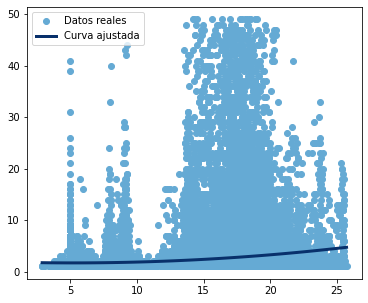

Error Absoluto Medio: 2.3121304801066866
Error Cuadrático Medio: 24.803999602304618
Raíz del Error Cuadrático Medio: 4.980361392740955
R-cuadrado: 0.007559450749866414


In [20]:
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[variable_x]
y = df_cleaned[variable_y]

# Definir la función logarítmica
def logarithmic_function(x, a, b):
    return a * np.log(x) + b

# Ajustar la curva a los datos de entrenamiento
popt2, pcov2 = curve_fit(logarithmic_function, X, y)

print(f'Coeficientes (a, b): {popt2}')

# Realizar predicciones en el conjunto de prueba
predicciones = logarithmic_function(X, *popt2)

# Crear una gráfica de dispersión con la curva ajustada
plt.figure(figsize=(6, 5))
plt.scatter(X, y, c='#65AAD4', label='Datos reales')
x_range = np.linspace(X.min(), X.max(), 100)
plt.plot(x_range, quadratic_function(x_range, *popt1), color='#08306B', linewidth=3, label='Curva ajustada')
plt.title('Regresión Logarítmica')
plt.xlabel('Tasa_efectiva_promedio_ponderada')
plt.ylabel('Numero_de_creditos_desembolsados')
plt.legend()
plt.show()


# Calcular métricas de evaluación del modelo
rf_mse = mean_squared_error(y, predicciones)
rf_r2 = r2_score(y, predicciones)
rf_mae = mean_absolute_error(y, predicciones)
rf_rmse = np.sqrt(rf_mse)

# Imprimir las métricas de evaluación del modelo
print(f'Error Absoluto Medio: {rf_mae}')
print(f'Error Cuadrático Medio: {rf_mse}')
print(f'Raíz del Error Cuadrático Medio: {rf_rmse}')
print(f'R-cuadrado: {rf_r2}')

### Análisis de regresión exponencial



Coeficientes (a, b): [1.09535161 0.05347555]


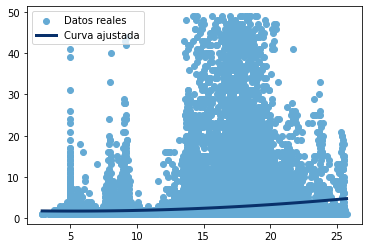

Error Absoluto Medio: 2.303501554502805
Error Cuadrático Medio: 24.746781865920823
Raíz del Error Cuadrático Medio: 4.974613740374304
R-cuadrado: 0.00984880741145533


In [19]:
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[variable_x]
y = df_cleaned[variable_y]

# Definir la función exponencial
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Ajustar la curva a los datos de entrenamiento
popt, pcov = curve_fit(exponential_function, X, y)

print(f'Coeficientes (a, b): {popt}')

# Realizar predicciones en el conjunto de prueba
predicciones = exponential_function(X, *popt)

# Crear una gráfica de dispersión con la curva ajustada
plt.scatter(X, y, c='#65AAD4', label='Datos reales')
x_range = np.linspace(X.min(), X.max(), 100)
plt.plot(x_range, quadratic_function(x_range, *popt1), color='#08306B', linewidth=3, label='Curva ajustada')
##plt.title('Regresión Exponencial')
##plt.xlabel('Tasa_efectiva_promedio_ponderada')
##plt.ylabel('Numero_de_creditos_desembolsados')
plt.legend()
plt.show()

# Calcular métricas de evaluación del modelo
rf_mse = mean_squared_error(y, predicciones)
rf_r2 = r2_score(y, predicciones)
rf_mae = mean_absolute_error(y, predicciones)
rf_rmse = np.sqrt(rf_mse)

# Imprimir las métricas de evaluación del modelo
print(f'Error Absoluto Medio: {rf_mae}')
print(f'Error Cuadrático Medio: {rf_mse}')
print(f'Raíz del Error Cuadrático Medio: {rf_rmse}')
print(f'R-cuadrado: {rf_r2}')

### Análisis de regresión LTS

                           Robust linear Model Regression Results                           
Dep. Variable:     Numero_de_creditos_desembolsados   No. Observations:                46215
Model:                                          RLM   Df Residuals:                    46214
Method:                                        IRLS   Df Model:                            0
Norm:                                   TrimmedMean                                         
Scale Est.:                                     mad                                         
Cov Type:                                        H1                                         
Date:                              Thu, 18 Jan 2024                                         
Time:                                      20:35:32                                         
No. Iterations:                                  21                                         
                                       coef    std err          z     

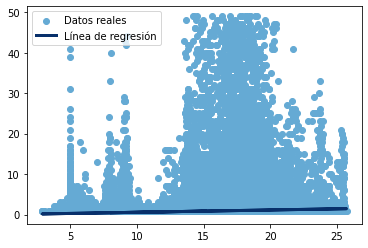

Error Absoluto Medio: 1.7032649007964635
Error Cuadrático Medio: 27.615409438973803
Raíz del Error Cuadrático Medio: 5.255036578271725
R-cuadrado: -0.10492874338040403


In [21]:
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[variable_x]
y = df_cleaned[variable_y]

# Utilizaremos la función rlm (Robust Linear Model) de statsmodels con el método 'least trimmed squares'
model_lts = sm.RLM(y, X, M=sm.robust.norms.TrimmedMean(0.5))
result = model_lts.fit()

print(result.summary())

# Realizar predicciones en el conjunto de prueba
predicciones = result.predict(X)

# Crear una gráfica de dispersión con la línea de regresión
plt.scatter(X, y, c='#65AAD4', label='Datos reales')
plt.plot(X, predicciones, color='#08306B', linewidth=3, label='Línea de regresión')
##plt.title('Regresión LTS')
##plt.xlabel('Tasa_efectiva_promedio_ponderada')
##plt.ylabel('Numero_de_creditos_desembolsados')
plt.legend()
plt.show()

# Calcular métricas de evaluación del modelo
rf_mse = mean_squared_error(y, predicciones)
rf_r2 = r2_score(y, predicciones)
rf_mae = mean_absolute_error(y, predicciones)
rf_rmse = np.sqrt(rf_mse)

# Imprimir las métricas de evaluación del modelo
print(f'Error Absoluto Medio: {rf_mae}')
print(f'Error Cuadrático Medio: {rf_mse}')
print(f'Raíz del Error Cuadrático Medio: {rf_rmse}')
print(f'R-cuadrado: {rf_r2}')

# Referencias

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Morales Daniel. DataSurce.ai. 2020. _Una Guía Paso A Paso Para Crear Visualizaciones Avanzadas de Datos de Python Con Seaborn / Matplotlib_. [URL](https://www.datasource.ai/es/data-science-articles/una-guia-paso-a-paso-para-crear-visualizaciones-avanzadas-de-datos-de-python-con-seaborn-matplotlib)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>CodeToDevs. _Cómo crear un mapa de calor de correlaciones de datos en Python (corrcoef y heatmap)_ [URL](https://www.codetodevs.com/como-crear-mapa-calor-correlaciones-python-corrcoef-heatmap/)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Scikit-learn developers._3.3. Métricas y puntuación: cuantificar la calidad de las predicciones_. [URL](https://qu4nt.github.io/sklearn-doc-es/modules/model_evaluation.html)
